In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import seaborn as sns


df = pd.read_json("review.json", encoding="utf-8")

p = re.compile(r'\d+')


def parser(body):
    bs = BeautifulSoup(body, 'html.parser')
    user_name = bs.find('span', class_='X43Kjb').text
    date = bs.find('span', class_='p2TkOb').text
    rating = bs.find('div', {'role': 'img'})['aria-label']
    rating = p.findall(rating)[-2]
    review_text = bs.find('span', {'jsname': 'bN97Pc'}).text
    return user_name, date, rating, review_text


df['user_name'], df['date'], df['rating'], df['review_text'] = zip(*df['body'].map(parser))
del df["body"]

df.head(3)

,user_name,date,rating,review_text
0,蕭吉良,2019年7月8日,5,太貴了，每月99元，換算每年1188元，比絕大多數的食譜書貴上好幾倍，建議降為一次收費或是每...
1,李韋瑤,2019年7月7日,5,常有許多簡單易懂而且容易上手的料理說明，也有讓我想要嘗試的感覺，總之，我覺得它非常不錯。
2,陳佩華,2019年7月3日,4,方便，隨時可以找到適合自己的食譜


In [2]:
df.to_csv('icook_reviews.csv', encoding='utf-8', index=False)

e:\python\pyai\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


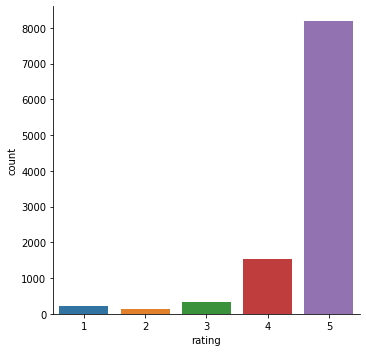

In [3]:
sns.factorplot('rating',kind='count',data=df)

In [4]:
df['rating'].value_counts()

5    8191
4    1546
3     318
1     219
2     134
Name: rating, dtype: int64

In [5]:
high_rate_review = df[df['rating'] == '5']['review_text']
low_rate_review = df[df['rating'] <= '2']['review_text']

In [6]:
len(high_rate_review)

8191

In [7]:
len(low_rate_review)

353

In [8]:
high_rate_review[:10]

0     太貴了，每月99元，換算每年1188元，比絕大多數的食譜書貴上好幾倍，建議降為一次收費或是每...
1          常有許多簡單易懂而且容易上手的料理說明，也有讓我想要嘗試的感覺，總之，我覺得它非常不錯。
3                               建議在app中的食譜也加上料理製作時間及幾人份
4                  想找的食譜幾乎都能順利找到，而且還是有幾種方法可以自行選擇，很棒，很實用
5                          菜色多元，以使用本App很久，對廚藝提升與運用很有幫助！
6                  對於新手的我而言，這邊有太多前輩的經驗能分享，讓我好好慢慢的學習，謝謝。
8                             有許多簡單易上手的料理，每天煮飯都可以有不同的變化
9                            很實用，也能根據自己的等級來選擇食譜，真是太方便了!
10                               我覺得很好用 基本上想的到的食材、食譜都有！
11                                           很好可是我最喜歡美食
Name: review_text, dtype: object

In [9]:
low_rate_review[:10]

7                                                更新後無法使用
177                  已經寫信非常多次反應，已經買vip, 卻沒變vip，到底需要反應幾次？
316                                    喜歡更新前食譜的頁面，滑動比較方便
329                想知道為什麼程式會自動刪除？每一次打開就要重新下載一次？（我是付費VIP)
371                                  最近下載完之後app都會自己刪除？？？
466                                         更新有問題，無限迴圈更新
469    好用是好用 但詐騙集團嗎 之前只訂閱了一次月繳vip 後來早已忘了這件事情 根本沒上線過 結...
470    為何oppo的手機管家偵測出你們app有木馬?請給使用者完整一點的答覆。是誤判，還是真的被駭...
472                    還要vip 才能看某些菜譜 扯耶 網上都有類似的 不差你一個軟體的
475    廣告變多，因為是免費版本所以可以接受。但是更新卻需要很多不必要的權限，無法認同。藉由這種方式...
Name: review_text, dtype: object

In [11]:
import jieba
def reviewcut(r):
    return " ".join(jieba.cut(r))
high_rate_review = df['review_text'].apply(reviewcut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BIGDAT~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.667 seconds.
Prefix dict has been built succesfully.


In [14]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

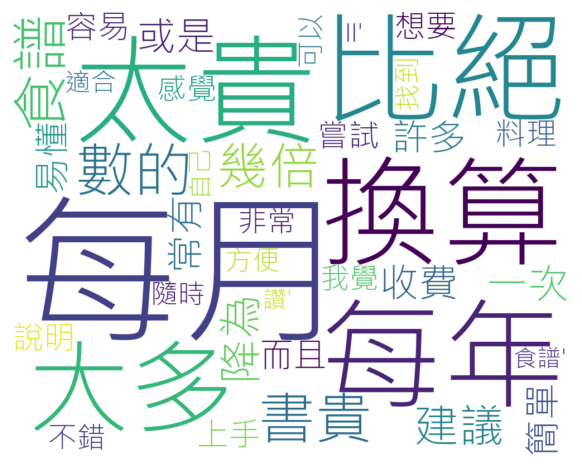

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font=r"E:\Python\PyAI\msjhl.ttc"
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

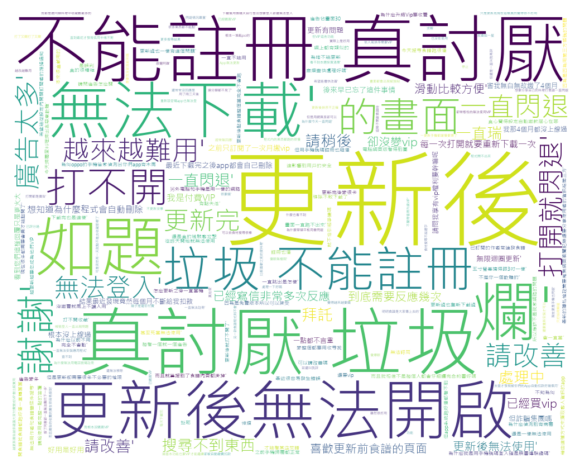

In [16]:
font=r"E:\Python\PyAI\msjhl.ttc"
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()